## Local Kitchens Take Home Assignment - Naresh Anadkat

## Importing Libraries

In [1]:
import csv
import math
import pandas as pd
import numpy as np
import scipy.stats
import statistics
from datetime import datetime
import cufflinks as cf
from operator import attrgetter
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


#Graphing Libraries
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import plotly.io as pio
import chart_studio.plotly as py
import chart_studio
%matplotlib inline

In [2]:
#chart_studio.tools.set_credentials_file(username='nareshanadkat', api_key='*********')

In [3]:
# Reading the CSV file
df = pd.read_csv("sample_orders.csv")

## Data Cleaning & Formatting

In [4]:
# Changing Column Names:
df = df.rename(columns={'time_opened':'order_time'})
df = df.rename(columns={'subtotal':'amount_spent'})

In [5]:
# Checking dtypes & changing to order_time to DatetimeIndex dtype
df.info()
df['order_time'] = pd.to_datetime(df['order_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_time    2070 non-null   object 
 1   customer_id   2074 non-null   float64
 2   amount_spent  2074 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 48.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_time    2070 non-null   datetime64[ns]
 1   customer_id   2074 non-null   float64       
 2   amount_spent  2074 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 48.7 KB


In [6]:
# Dropping all values where time_opened column are empty
print(df.count())
df = df[df['order_time'].notna()]
print(df.count())
# Dropped 4 values where the time_opened was empty.

order_time      2070
customer_id     2074
amount_spent    2074
dtype: int64
order_time      2070
customer_id     2070
amount_spent    2070
dtype: int64


In [7]:
# Checking for any duplicate values in the remainging DataFrame
df.duplicated().describe()
# No duplicates found - data looks good to work with.

count      2070
unique        1
top       False
freq       2070
dtype: object

In [8]:
# Converting 'amount_spent' column from cents to dollar value
df['amount_spent'] = df['amount_spent'].div(100)
df

,order_time,customer_id,amount_spent
0,2021-01-23 16:05:00,-2.266540e+18,0.50
1,2021-01-23 17:37:00,3.108850e+18,17.25
2,2021-01-23 17:39:00,8.193680e+18,5.59
3,2021-01-23 18:40:00,-2.779480e+18,58.50
4,2021-01-23 18:45:00,-7.685560e+18,42.58
...,...,...,...
2065,2021-03-21 14:02:00,-7.486680e+18,84.00
2066,2021-03-21 14:03:00,-5.967440e+18,13.50
2067,2021-03-21 14:44:00,1.700620e+18,35.45
2068,2021-03-21 14:57:00,-3.800620e+18,19.45


## Data Analysis - Statistics & Insights

In [9]:
# Goal: Gain a deeper understanding of user purchasing behaviour given provided data

# To start off, I wanted to analyze the data from a high overview, starting from orders placed by month and diving deeper into consumer spending habbits & statistics.

# Adding column in DataFrame full of '1' to illustrate number of orders placed.
df['number_of_orders'] = 1
df['order_time'] = pd.to_datetime(df['order_time']) - pd.to_timedelta(7, unit='d')
orders_by_week = df.groupby(pd.Grouper(key='order_time', freq='W-MON'))['number_of_orders'].sum().reset_index().sort_values('order_time')

# DataFrame of orders placed by week.
print(orders_by_week)

# Plotting bar graph
orders_by_week_bar = px.bar(orders_by_week, x="order_time",y='number_of_orders', color_discrete_sequence=['indianred'])
orders_by_week_bar.show()
#py.plot(orders_by_week_bar, filename = 'orders_by_week_bar', auto_open=True)


  order_time  number_of_orders
0 2021-01-18                10
1 2021-01-25               107
2 2021-02-01               161
3 2021-02-08               264
4 2021-02-15               264
5 2021-02-22               315
6 2021-03-01               293
7 2021-03-08               368
8 2021-03-15               288


In [10]:
revenue_by_week = df.groupby(pd.Grouper(key='order_time', freq='W-MON'))['amount_spent'].sum().reset_index().sort_values('order_time')

# DataFrame of revenue by week.
print(revenue_by_week)

# Plotting bar graph
revenue_by_week_bar = px.bar(revenue_by_week, x="order_time", y='amount_spent', color_discrete_sequence=['indianred'])
revenue_by_week_bar.show()
#py.plot(revenue_by_week_bar, filename = 'revenue_by_week_bar', auto_open=True)

  order_time  amount_spent
0 2021-01-18        319.70
1 2021-01-25       3133.61
2 2021-02-01       4259.07
3 2021-02-08       7950.11
4 2021-02-15       7151.16
5 2021-02-22       7718.76
6 2021-03-01       7890.76
7 2021-03-08      10192.91
8 2021-03-15       6873.99


In [11]:
# Hourly Demand Distribution (Percentage)

df['order_time'] = pd.to_datetime(df['order_time'])

orders_by_hour = df.order_time.dt.hour.value_counts(normalize = True).reset_index().sort_values('order_time')
print(orders_by_hour)
orders_by_hour_bar = px.bar(orders_by_hour, x="index", y='order_time', color_discrete_sequence=['indianred'])
orders_by_hour_bar.show()

#py.plot(orders_by_hour_bar, filename = 'orders_by_hour_bar', auto_open=True)

    index  order_time
15     23    0.000966
14     22    0.002899
13      8    0.005797
12     21    0.007729
11     10    0.013043
10      9    0.013527
9      20    0.040580
8      15    0.051691
7      19    0.068116
6      16    0.072947
5      14    0.079710
4      11    0.092754
3      17    0.105314
2      18    0.110628
1      13    0.136715
0      12    0.197585


In [12]:
# Hourly Revenue Distribution

df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df["hour"] = df["order_time"].dt.hour
revenue_by_hour = df.groupby("hour").sum().reset_index()


revenue_by_hour_bar = px.bar(revenue_by_hour, x="hour", y='amount_spent', color_discrete_sequence=['indianred'])
revenue_by_hour_bar.show()
#py.plot(revenue_by_hour_bar, filename = 'revenue_by_hour_bar', auto_open=True)

In [13]:
day_of_week_data = df.groupby(df['order_time'].dt.day_name()).sum().reset_index()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_data = day_of_week_data.set_index('order_time').loc[weekdays].reset_index()
print (day_of_week_data)
orders_by_day_week_bar = px.bar(day_of_week_data, x="order_time", y='number_of_orders', color_discrete_sequence=['indianred'])
orders_by_day_week_bar.show()
#py.plot(orders_by_day_week_bar, filename = 'orders_by_day_week_bar', auto_open=True)

revenue_by_day_week_bar = px.bar(day_of_week_data, x="order_time", y='amount_spent')
revenue_by_day_week_bar.show()

  order_time   customer_id  amount_spent  number_of_orders  hour
0     Monday -1.203264e+20       4861.68               205  3006
1    Tuesday  3.025814e+19       4839.54               202  2983
2  Wednesday  5.958476e+19       6859.19               272  3895
3   Thursday -1.343067e+20       5825.56               234  3453
4     Friday -3.334546e+19       9749.63               352  5383
5   Saturday -6.367289e+19      13372.84               453  6687
6     Sunday -8.392593e+19       9981.63               352  4942


In [14]:
# Getting a list of our current top 10 customers would be interesting to see how 
customers = df.groupby('customer_id').sum().sort_values('number_of_orders', ascending=False).iloc[:10].reset_index()
customers

,customer_id,amount_spent,number_of_orders,hour
0,-2.001730e+18,330.52,18,217
1,-2.472320e+18,180.20,13,180
2,-9.714780e+17,157.12,11,171
3,5.481780e+17,218.65,9,111
4,4.218970e+18,148.45,8,111
5,-7.676060e+18,94.65,7,82
6,-7.643620e+18,98.40,7,84
7,-3.805380e+17,224.66,7,93
8,-2.765000e+18,87.98,7,84
9,-6.332080e+18,159.37,6,109


In [15]:
## Knowing a bit more about our customers, I thought it would be interesting to create a stacked bar graph to segment first time purchases vs recurring purchases by week

#Dropping all duplicate customer ids and keeping the ones that showed up for the first time. 
first_time_orders = df.drop_duplicates(subset=['customer_id'], keep='first')

#Grouping them by week
first_time_orders_cleaned = first_time_orders.groupby(pd.Grouper(key='order_time', freq='W-MON'))['number_of_orders'].sum().reset_index().sort_values('order_time')

print(first_time_orders_cleaned)

# I already know the total orders so I can create an overlay bar graph to see from the total number of orders, how many of those are actually first time orders
total_orders_week = df.groupby(pd.Grouper(key='order_time', freq='W-MON'))['number_of_orders'].sum().reset_index().sort_values('order_time')
print(total_orders_week)

# Plotting the overlay bar graph
order_data_bar_chart = go.Figure(data=[
    go.Bar(name='Total Orders', x=first_time_orders_cleaned.order_time, y=total_orders_week.number_of_orders),
    go.Bar(name='First Time Orders', x=first_time_orders_cleaned.order_time, y=first_time_orders_cleaned.number_of_orders)])

order_data_bar_chart.update_layout(barmode='overlay')
order_data_bar_chart.show()
#py.plot(order_data_bar_chart, filename = 'order_data_bar_chart', auto_open=True)

  order_time  number_of_orders
0 2021-01-18                10
1 2021-01-25                99
2 2021-02-01               143
3 2021-02-08               209
4 2021-02-15               192
5 2021-02-22               223
6 2021-03-01               187
7 2021-03-08               250
8 2021-03-15               196
  order_time  number_of_orders
0 2021-01-18                10
1 2021-01-25               107
2 2021-02-01               161
3 2021-02-08               264
4 2021-02-15               264
5 2021-02-22               315
6 2021-03-01               293
7 2021-03-08               368
8 2021-03-15               288


## User Behaviour Statistics

In [16]:
# Mean Spending 
statistics.fmean(df.amount_spent)

26.806797101449277

In [17]:
df.describe()
# Mean spending on a given order: $26.81, median: $24.42, std: $16.62

,customer_id,amount_spent,number_of_orders,hour
count,2.070000e+03,2070.000000,2070.0,2070.000000
mean,-1.670215e+17,26.806797,1.0,14.661353
std,5.258884e+18,16.616394,0.0,2.991983
min,-9.189490e+18,0.000000,1.0,8.000000
25%,-4.711930e+18,13.500000,1.0,12.000000
50%,-3.805380e+17,24.420000,1.0,14.000000
75%,4.302000e+18,35.227500,1.0,17.000000
max,9.208740e+18,217.970000,1.0,23.000000


In [18]:
boxplot = px.box(df, y="amount_spent")
boxplot.show()
#py.plot(boxplot, filename = 'boxplot', auto_open=True)

## Cohort Analysis

In [19]:
df['order_week'] = df['order_time'].dt.to_period('W')
df['Cohort'] = df.groupby('customer_id')['order_time'].transform('min').dt.to_period('W') 


In [20]:
df_Cohort = df.groupby(['Cohort', 'order_week']) \
              .agg(n_customers=('customer_id', 'nunique')) \
              .reset_index(drop=False)
df_Cohort['Period Number'] = (df_Cohort.order_week - df_Cohort.Cohort).apply(attrgetter('n'))
df_Cohort

,Cohort,order_week,n_customers,Period Number
0,2021-01-11/2021-01-17,2021-01-11/2021-01-17,10,0
1,2021-01-11/2021-01-17,2021-01-18/2021-01-24,3,1
2,2021-01-11/2021-01-17,2021-01-25/2021-01-31,1,2
3,2021-01-11/2021-01-17,2021-02-01/2021-02-07,1,3
4,2021-01-11/2021-01-17,2021-02-22/2021-02-28,1,6
5,2021-01-18/2021-01-24,2021-01-18/2021-01-24,99,0
6,2021-01-18/2021-01-24,2021-01-25/2021-01-31,9,1
7,2021-01-18/2021-01-24,2021-02-01/2021-02-07,7,2
8,2021-01-18/2021-01-24,2021-02-08/2021-02-14,7,3
9,2021-01-18/2021-01-24,2021-02-15/2021-02-21,6,4


In [21]:
cohort_pivot = df_Cohort.pivot_table(index = 'Cohort',
                                     columns = 'Period Number',
                                     values = 'n_customers')
cohort_pivot

Period Number,0,1,2,3,4,5,6,7
Cohort,,,,,,,,
2021-01-11/2021-01-17,10.0,3.0,1.0,1.0,NaN,NaN,1.0,NaN
2021-01-18/2021-01-24,99.0,9.0,7.0,7.0,6.0,8.0,5.0,3.0
2021-01-25/2021-01-31,119.0,11.0,19.0,11.0,16.0,4.0,7.0,NaN
2021-02-01/2021-02-07,204.0,18.0,18.0,19.0,13.0,14.0,NaN,NaN
2021-02-08/2021-02-14,205.0,23.0,13.0,17.0,15.0,NaN,NaN,NaN
2021-02-15/2021-02-21,213.0,19.0,13.0,10.0,NaN,NaN,NaN,NaN
2021-02-22/2021-02-28,195.0,26.0,13.0,NaN,NaN,NaN,NaN,NaN
2021-03-01/2021-03-07,241.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-08/2021-03-14,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

Period Number,0,1,2,3,4,5,6,7
Cohort,,,,,,,,
2021-01-11/2021-01-17,1.0,0.300000,0.100000,0.100000,NaN,NaN,0.100000,NaN
2021-01-18/2021-01-24,1.0,0.090909,0.070707,0.070707,0.060606,0.080808,0.050505,0.030303
2021-01-25/2021-01-31,1.0,0.092437,0.159664,0.092437,0.134454,0.033613,0.058824,NaN
2021-02-01/2021-02-07,1.0,0.088235,0.088235,0.093137,0.063725,0.068627,NaN,NaN
2021-02-08/2021-02-14,1.0,0.112195,0.063415,0.082927,0.073171,NaN,NaN,NaN
2021-02-15/2021-02-21,1.0,0.089202,0.061033,0.046948,NaN,NaN,NaN,NaN
2021-02-22/2021-02-28,1.0,0.133333,0.066667,NaN,NaN,NaN,NaN,NaN
2021-03-01/2021-03-07,1.0,0.066390,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-08/2021-03-14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


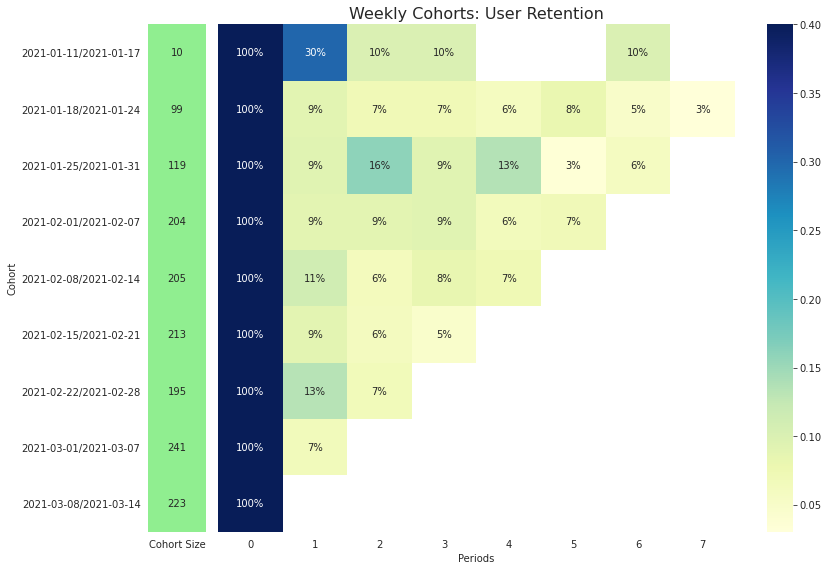

In [23]:
#Plotting Heatmap with Seaborn

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Retention Matrix:
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='YlGnBu',
                vmax = 0.4,
                ax=ax[1])
    ax[1].set_title('Weekly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='Periods',
              ylabel='')

    # Cohort Size Column:
    
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Cohort Size'})
    white_cmap = mcolors.ListedColormap(['lightgreen'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

## LTV Analysis

In [24]:
avg_amnount_spent = df.groupby(df['Cohort']).sum()
avg_amnount_spent['Average Amount Spent'] = avg_amnount_spent.amount_spent/avg_amnount_spent.number_of_orders

avg_amount_spent_cleaned = avg_amnount_spent.reset_index()[['Cohort', 'Average Amount Spent']]

# Retension Rates from above Cohort Analysis
avg_amount_spent_cleaned['Retention Rates'] = [0, 0.030303, 0.058824, 0.068627, 0.073171, 0.046948, 0.066667, 0.066390, 0]

#LTV Calculation for a given period
avg_amount_spent_cleaned['LTV_period'] = avg_amount_spent_cleaned['Average Amount Spent']*(1- avg_amount_spent_cleaned['Retention Rates'])
avg_amount_spent_cleaned

,Cohort,Average Amount Spent,Retention Rates,LTV_period
0,2021-01-11/2021-01-17,26.634375,0.000000,26.634375
1,2021-01-18/2021-01-24,28.298758,0.030303,27.441221
2,2021-01-25/2021-01-31,25.450968,0.058824,23.953840
3,2021-02-01/2021-02-07,28.481976,0.068627,26.527343
4,2021-02-08/2021-02-14,26.802407,0.073171,24.841248
5,2021-02-15/2021-02-21,24.553152,0.046948,23.400431
6,2021-02-22/2021-02-28,28.256226,0.066667,26.372468
7,2021-03-01/2021-03-07,27.976175,0.066390,26.118837
8,2021-03-08/2021-03-14,24.387890,0.000000,24.387890


In [25]:
# LTV Calculated
avg_amount_spent_cleaned['LTV_period'].mean().round(2)

25.52